In [1]:
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from ggplot import *
%matplotlib inline
np.random.seed(0)
df=pd.read_csv('Matric Reports 2016.csv',encoding = 'unicode_escape')
#get the shape of the data set
df.shape

C:\Users\rhino\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(1000, 15)

In [2]:
df.head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


In [3]:
#Get all thw columns of the data frame to see if any of them could be removed.
df.columns

Index(['emis', 'centre_no', 'name', 'quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016'],
      dtype='object')

In [4]:
#get statistical analysis of the data frame
df.describe()

,emis,centre_no,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
count,1.000000e+03,1.000000e+03,991.000000,956.000000,956.000000,998.000000,980.000000,980.000000,980.000000,980.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.348575e+08,3.994567e+06,8.094854,77.348326,53.077406,63.323747,14.276531,95.574490,58.542857,60.089388,15.861000,89.773000,56.963000,62.770400
std,8.929679e+07,3.429188e+05,22.496848,55.949164,46.171910,26.274427,24.813092,70.746289,52.857192,24.734157,22.779609,70.957046,51.711447,25.184871
min,0.000000e+00,3.171001e+06,1.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.002005e+08,4.051009e+06,2.000000,38.000000,21.000000,46.425000,0.000000,45.000000,21.000000,39.575000,0.000000,39.000000,19.000000,43.050000
50%,2.004007e+08,4.121034e+06,3.000000,63.500000,39.000000,66.700000,4.000000,80.000000,42.000000,59.650000,6.000000,70.500000,43.000000,63.350000
75%,2.006003e+08,4.181066e+06,3.000000,102.000000,72.000000,84.950000,18.000000,127.000000,79.000000,80.925000,25.000000,122.000000,76.000000,85.325000
max,4.452033e+08,4.232037e+06,99.000000,416.000000,343.000000,100.000000,264.000000,648.000000,428.000000,100.000000,181.000000,707.000000,378.000000,100.000000


In [5]:
#getting count of missing values from data
missing_values_count=df.isnull().sum()
missing_values_count

emis                0
centre_no           0
name                0
quintile            9
wrote_2014         44
passed_2014        44
perc_2014           2
progressed_2015    20
wrote_2015         20
passed_2015        20
perc_2015          20
progressed_2016     0
wrote_2016          0
passed_2016         0
perc_2016           0
dtype: int64

In [6]:
#how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.1933333333333334

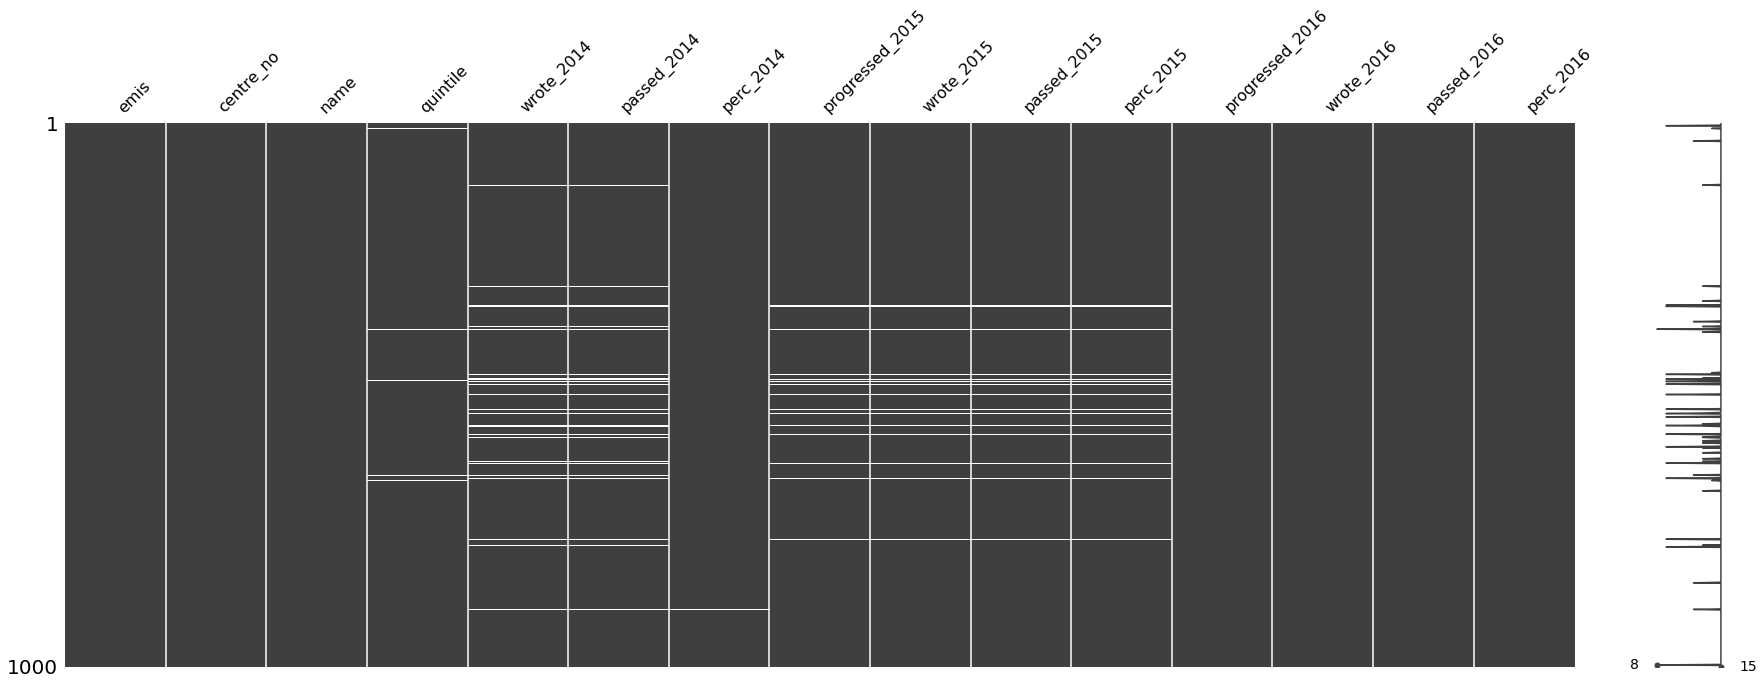

In [7]:
missingno.matrix(df, figsize = (30,10))

In [8]:
#get the value counts of the name column in the data set
df['name'].value_counts()

NGUBESIZWE SENIOR SECONDARY SCHOOL    3
PAKAMANI SENIOR SECONDARY SCHOOL      3
DONDASHE SENIOR SECONDARY SCHOOL      2
MZOMHLE SENIOR SECONDARY SCHOOL       2
KUYASA SENIOR SECONDARY SCHOOL        2
                                     ..
MANDELA SCHOOL OF SCIENCE AND TECH    1
FUNDANI HIGH SCHOOL                   1
MGEZWA SENIOR SECONDARY SCHOOL        1
MATSERIPE SS                          1
NONDWE SENIOR SECONDARY SECONDARY     1
Name: name, Length: 983, dtype: int64

In [9]:
# convert to lower case
df['name'] = df['name'].str.lower()

# remove trailing white spaces
df['name'] = df['name'].str.strip()

# Let us view the data

names = df['name'].unique()
# sort them alphabetically and then take a closer look
names.sort()
names

array(['a d tshayingca secondary school', 'a m sityana high school',
       'a.m.zantsi senior secondary school',
       'a.v platjie senior secondary school', 'abambo high school',
       'aberdeen senior secondary school', 'academy of excellence ci/s',
       'accelerated christian college si/s', 'accord business academy',
       'adelaide gymnasium', 'aeroville senior secondary school',
       'afrikaanse hskool kroonstad', 'afrikaanse hskool sasolburg',
       'akademia ss', 'alazhar primary institute', 'albert moroka ss',
       'alexander road high school', 'alexandria high school',
       'alfred giba senior secondary school', 'aliwal north high school',
       'alphendale secondary school', 'althorpe college',
       'am tapa senior secondary school',
       'amabele senior secondary school', 'amabhele high school',
       'amajingqi senior secondary school',
       'amazizi senior secondary school', 'aramela cs',
       'arcadia senior secondary school',
       'archie velile 

In [10]:
#place the data into bins
df_bin=df
df_con=df

In [11]:
# replace all NA's with 0
df.fillna(0).head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,amabele senior secondary school,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,bethel college high school,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,blythswood institution,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,bongolethu senior secondary school,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,butterworth high school,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


In [19]:
group_by_quintile = df.groupby(by=['quintile'])

passed_avg = round(group_by_quintile.mean(),0)
passed_avg

,emis,centre_no,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
quintile,,,,,,,,,,,,,
1.0,231332264.0,3957536.0,81.0,50.0,57.0,20.0,112.0,59.0,52.0,24.0,107.0,57.0,53.0
2.0,238704486.0,3969949.0,70.0,44.0,60.0,14.0,90.0,50.0,54.0,16.0,85.0,50.0,58.0
3.0,222187290.0,4068175.0,77.0,50.0,59.0,16.0,94.0,54.0,55.0,18.0,87.0,53.0,59.0
4.0,228326927.0,4032472.0,77.0,65.0,87.0,8.0,96.0,78.0,85.0,6.0,88.0,72.0,86.0
5.0,291539995.0,3811015.0,108.0,102.0,93.0,3.0,111.0,105.0,94.0,3.0,106.0,101.0,95.0
99.0,254788308.0,3942826.0,49.0,34.0,69.0,2.0,49.0,35.0,74.0,1.0,46.0,35.0,75.0


In [42]:
quintile_count=df['quintile'].value_counts()
quintile_count

3.0     390
1.0     220
2.0     196
5.0      85
99.0     57
4.0      43
Name: quintile, dtype: int64

3.0     390
1.0     220
2.0     196
5.0      85
99.0     57
4.0      43
Name: quintile, dtype: int64


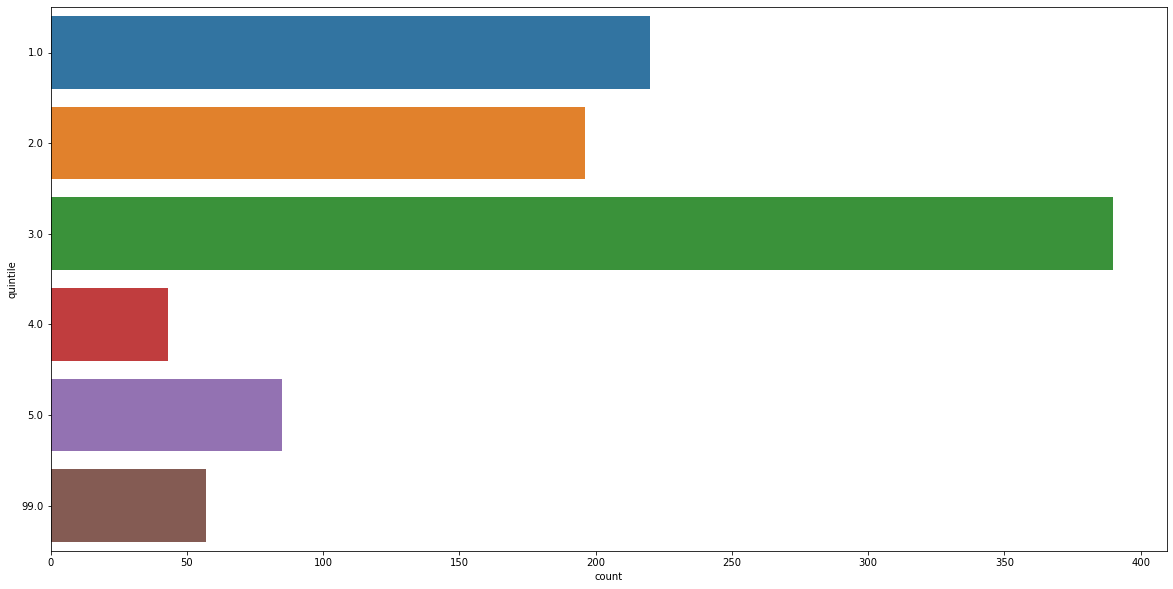

In [15]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(y = 'quintile', data = df_bin)
print(df_bin.quintile.value_counts())

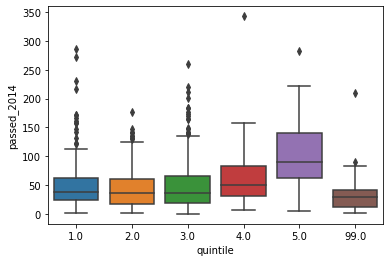

In [43]:
sns.boxplot(x='quintile',y='passed_2014',data=df)
plt.show()

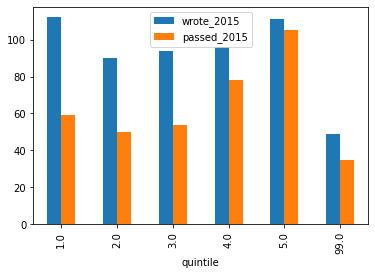

In [24]:
Wrote_vs_passed = pd.DataFrame({'wrote_2015': passed_avg['wrote_2015'],
                                     'passed_2015': passed_avg['passed_2015'],
                                   }
                                   )
Wrote_vs_passed = Wrote_vs_passed.iloc[:20,]
Wrote_vs_passed.plot(kind='bar')

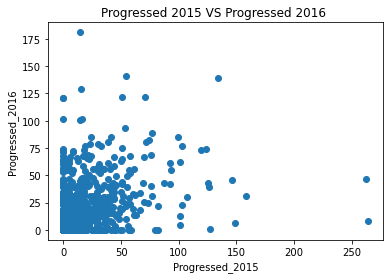

In [76]:
x = df['progressed_2015']
y= df['progressed_2016']
plt.scatter(x,y)
plt.title('Progressed 2015 VS Progressed 2016 ')
plt.xlabel('Progressed_2015')
plt.ylabel('Progressed_2016')
plt.show()

In [35]:
df_grouped = df[['quintile', 'name', 'wrote_2014']]
grouped_avg = df_grouped.groupby(['quintile','name'], as_index=False).mean()
grouped_avg

,quintile,name,wrote_2014
0,1.0,a.m.zantsi senior secondary school,55.0
1,1.0,amabele senior secondary school,37.0
2,1.0,baleni senior secondary school,121.0
3,1.0,bambilanga senior secondary school,31.0
4,1.0,barnard molokoane ss,95.0
...,...,...,...
981,99.0,vaal christian ci/s,58.0
982,99.0,vukuzenzele special school,3.0
983,99.0,zamokuhle special school,6.0
984,99.0,zanokhanyo baptist comprehensive sch,NaN


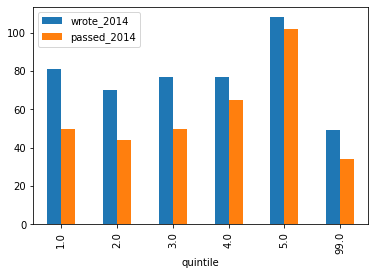

In [30]:
Wrote_vs_passed = pd.DataFrame({'wrote_2014': passed_avg['wrote_2014'],
                                     'passed_2014': passed_avg['passed_2014'],
                                   }
                                   )
Wrote_vs_passed = Wrote_vs_passed.iloc[:20,]
Wrote_vs_passed.plot(kind='bar')

In [36]:
pivot_table = grouped_avg.pivot(index='quintile', columns='name')
pivot_table = pivot_table.fillna(0)
pivot_table

wrote_2014                          \
name     a d tshayingca secondary school a m sityana high school   
quintile                                                           
1.0                                  0.0                     0.0   
2.0                                  0.0                    42.0   
3.0                                  0.0                     0.0   
4.0                                  0.0                     0.0   
5.0                                  0.0                     0.0   
99.0                                 0.0                     0.0   

                                             \
name     a.m.zantsi senior secondary school   
quintile                                      
1.0                                    55.0   
2.0                                     0.0   
3.0                                     0.0   
4.0                                     0.0   
5.0                                     0.0   
99.0                                    0.0   

                                                                 \
name     a.v platjie senior secondary school abambo high school   
quintile                                                          
1.0                                      0.0                0.0   
2.0                                      0.0              104.0   
3.0                                     40.0                0.0   
4.0                                      0.0                0.0   
5.0                                      0.0                0.0   
99.0                                     0.0                0.0   

                                                                      \
name     aberdeen senior secondary school academy of excellence ci/s   
quintile                                                               
1.0                                   0.0                        0.0   
2.0                                   0.0                        0.0   
3.0                                  50.0                        0.0   
4.0                                   0.0                        0.0   
5.0                                   0.0                        0.0   
99.0                                  0.0                       30.0   

                                                                     \
name     accelerated christian college si/s accord business academy   
quintile                                                              
1.0                                     0.0                     0.0   
2.0                                     0.0                     0.0   
3.0                                     0.0                     0.0   
4.0                                     0.0                     0.0   
5.0                                     0.0                     0.0   
99.0                                   41.0                    21.0   

                             ...                                       \
name     adelaide gymnasium  ... zwelibangile senior secondary school   
quintile                     ...                                        
1.0                     0.0  ...                                  0.0   
2.0                     0.0  ...                                  0.0   
3.0                     0.0  ...                                121.0   
4.0                    53.0  ...                                  0.0   
5.0                     0.0  ...                                  0.0   
99.0                    0.0  ...                                  0.0   

                                                                               \
name     zwelidumile senior secondary school zwelihle senior secondary school   
quintile                                                                        
1.0                                    100.0                             67.0   
2.0                                      0.0                              0.0   
3.0                                  

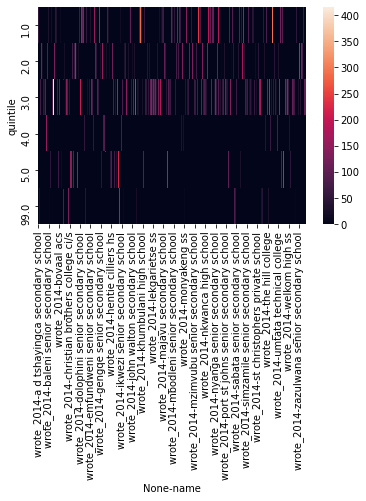

In [45]:
sns.heatmap(pivot_table)
plt.show()

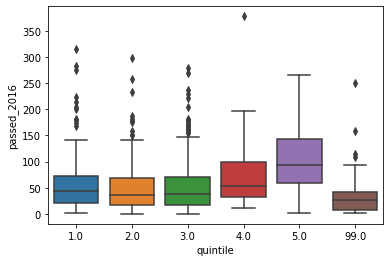

In [31]:
sns.boxplot(x='quintile',y='passed_2016',data=df)
plt.show()

In [39]:
df_grouped2 = df[['quintile', 'name', 'passed_2014']]
grouped_avg2 = df_grouped2.groupby(['quintile','name'], as_index=False).mean()
grouped_avg2

,quintile,name,passed_2014
0,1.0,a.m.zantsi senior secondary school,54.0
1,1.0,amabele senior secondary school,14.0
2,1.0,baleni senior secondary school,87.0
3,1.0,bambilanga senior secondary school,30.0
4,1.0,barnard molokoane ss,82.0
...,...,...,...
981,99.0,vaal christian ci/s,41.0
982,99.0,vukuzenzele special school,3.0
983,99.0,zamokuhle special school,6.0
984,99.0,zanokhanyo baptist comprehensive sch,NaN


In [40]:
pivot_table2 = grouped_avg2.pivot(index='quintile', columns='name')
pivot_table2 = pivot_table2.fillna(0)
pivot_table2

passed_2014                          \
name     a d tshayingca secondary school a m sityana high school   
quintile                                                           
1.0                                  0.0                     0.0   
2.0                                  0.0                    25.0   
3.0                                  0.0                     0.0   
4.0                                  0.0                     0.0   
5.0                                  0.0                     0.0   
99.0                                 0.0                     0.0   

                                             \
name     a.m.zantsi senior secondary school   
quintile                                      
1.0                                    54.0   
2.0                                     0.0   
3.0                                     0.0   
4.0                                     0.0   
5.0                                     0.0   
99.0                                    0.0   

                                                                 \
name     a.v platjie senior secondary school abambo high school   
quintile                                                          
1.0                                      0.0                0.0   
2.0                                      0.0               39.0   
3.0                                     28.0                0.0   
4.0                                      0.0                0.0   
5.0                                      0.0                0.0   
99.0                                     0.0                0.0   

                                                                      \
name     aberdeen senior secondary school academy of excellence ci/s   
quintile                                                               
1.0                                   0.0                        0.0   
2.0                                   0.0                        0.0   
3.0                                  20.0                        0.0   
4.0                                   0.0                        0.0   
5.0                                   0.0                        0.0   
99.0                                  0.0                       26.0   

                                                                     \
name     accelerated christian college si/s accord business academy   
quintile                                                              
1.0                                     0.0                     0.0   
2.0                                     0.0                     0.0   
3.0                                     0.0                     0.0   
4.0                                     0.0                     0.0   
5.0                                     0.0                     0.0   
99.0                                   36.0                    10.0   

                             ...                                       \
name     adelaide gymnasium  ... zwelibangile senior secondary school   
quintile                     ...                                        
1.0                     0.0  ...                                  0.0   
2.0                     0.0  ...                                  0.0   
3.0                     0.0  ...                                 58.0   
4.0                    44.0  ...                                  0.0   
5.0                     0.0  ...                                  0.0   
99.0                    0.0  ...                                  0.0   

                                                                               \
name     zwelidumile senior secondary school zwelihle senior secondary school   
quintile                                                                        
1.0                                     33.0                             29.0   
2.0                                      0.0                              0.0   
3.0                                 

In [42]:
df_grouped3 = df[['quintile', 'name', 'progressed_2015']]
grouped_avg3 = df_grouped3.groupby(['quintile','name'], as_index=False).mean()
grouped_avg3

,quintile,name,progressed_2015
0,1.0,a.m.zantsi senior secondary school,4.0
1,1.0,amabele senior secondary school,0.0
2,1.0,baleni senior secondary school,16.0
3,1.0,bambilanga senior secondary school,19.0
4,1.0,barnard molokoane ss,57.0
...,...,...,...
981,99.0,vaal christian ci/s,0.0
982,99.0,vukuzenzele special school,4.0
983,99.0,zamokuhle special school,0.0
984,99.0,zanokhanyo baptist comprehensive sch,8.0


In [43]:
pivot_table3 = grouped_avg3.pivot(index='quintile', columns='name')
pivot_table3 = pivot_table3.fillna(0)
pivot_table3

progressed_2015                          \
name     a d tshayingca secondary school a m sityana high school   
quintile                                                           
1.0                                  0.0                     0.0   
2.0                                  0.0                     3.0   
3.0                                  0.0                     0.0   
4.0                                  0.0                     0.0   
5.0                                  0.0                     0.0   
99.0                                 0.0                     0.0   

                                             \
name     a.m.zantsi senior secondary school   
quintile                                      
1.0                                     4.0   
2.0                                     0.0   
3.0                                     0.0   
4.0                                     0.0   
5.0                                     0.0   
99.0                                    0.0   

                                                                 \
name     a.v platjie senior secondary school abambo high school   
quintile                                                          
1.0                                      0.0                0.0   
2.0                                      0.0                1.0   
3.0                                     13.0                0.0   
4.0                                      0.0                0.0   
5.0                                      0.0                0.0   
99.0                                     0.0                0.0   

                                                                      \
name     aberdeen senior secondary school academy of excellence ci/s   
quintile                                                               
1.0                                   0.0                        0.0   
2.0                                   0.0                        0.0   
3.0                                  23.0                        0.0   
4.0                                   0.0                        0.0   
5.0                                   0.0                        0.0   
99.0                                  0.0                        0.0   

                                                                     \
name     accelerated christian college si/s accord business academy   
quintile                                                              
1.0                                     0.0                     0.0   
2.0                                     0.0                     0.0   
3.0                                     0.0                     0.0   
4.0                                     0.0                     0.0   
5.0                                     0.0                     0.0   
99.0                                    0.0                     5.0   

                             ...                                       \
name     adelaide gymnasium  ... zwelibangile senior secondary school   
quintile                     ...                                        
1.0                     0.0  ...                                  0.0   
2.0                     0.0  ...                                  0.0   
3.0                     0.0  ...                                 15.0   
4.0                     7.0  ...                                  0.0   
5.0                     0.0  ...                                  0.0   
99.0                    0.0  ...                                  0.0   

                                                                               \
name     zwelidumile senior secondary school zwelihle senior secondary school   
quintile                                                                        
1.0                                      6.0                              7.0   
2.0                                      0.0                              0.0   
3.0                             

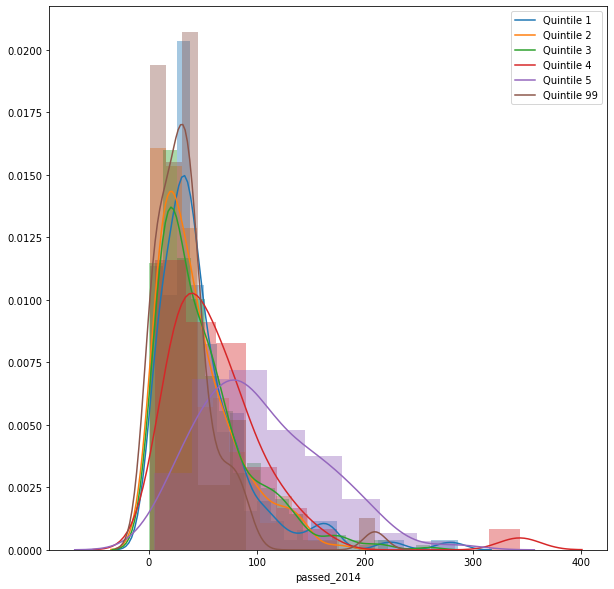

In [47]:
fig = plt.figure(figsize = (10, 10))
sns.distplot(df_bin.loc[df_bin['quintile']==1]['passed_2014'], kde_kws={'label' :'Quintile 1'})
sns.distplot(df_bin.loc[df_bin['quintile']==2]['passed_2014'], kde_kws={'label' :'Quintile 2'})
sns.distplot(df_bin.loc[df_bin['quintile']==3]['passed_2014'], kde_kws={'label' :'Quintile 3'})
sns.distplot(df_bin.loc[df_bin['quintile']==4]['passed_2014'], kde_kws={'label' :'Quintile 4'})
sns.distplot(df_bin.loc[df_bin['quintile']==5]['passed_2014'], kde_kws={'label' :'Quintile 5'})
sns.distplot(df_bin.loc[df_bin['quintile']==99]['passed_2014'], kde_kws={'label' :'Quintile 99'})

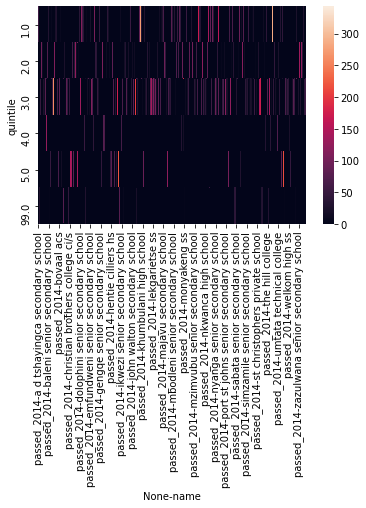

In [48]:
sns.heatmap(pivot_table2)
plt.show()

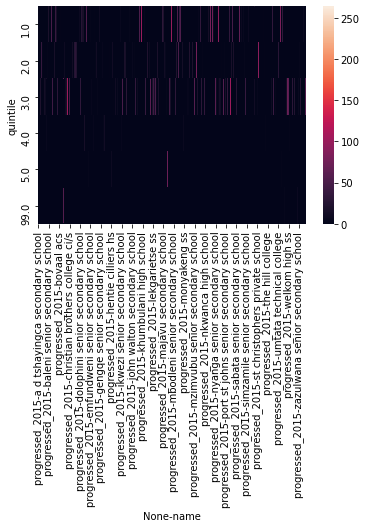

In [49]:
sns.heatmap(pivot_table3)
plt.show()

In [50]:
df_grouped4 = df[['quintile', 'name', 'wrote_2016']]
grouped_avg4 = df_grouped4.groupby(['quintile','name'], as_index=False).mean()
grouped_avg4

,quintile,name,wrote_2016
0,1.0,a.m.zantsi senior secondary school,58.0
1,1.0,amabele senior secondary school,51.0
2,1.0,baleni senior secondary school,120.0
3,1.0,bambilanga senior secondary school,48.0
4,1.0,barnard molokoane ss,131.0
...,...,...,...
981,99.0,vaal christian ci/s,47.0
982,99.0,vukuzenzele special school,9.0
983,99.0,zamokuhle special school,6.0
984,99.0,zanokhanyo baptist comprehensive sch,11.0


In [51]:
pivot_table4 = grouped_avg4.pivot(index='quintile', columns='name')
pivot_table4 = pivot_table4.fillna(0)
pivot_table4

wrote_2016                          \
name     a d tshayingca secondary school a m sityana high school   
quintile                                                           
1.0                                  0.0                     0.0   
2.0                                  0.0                    45.0   
3.0                                209.0                     0.0   
4.0                                  0.0                     0.0   
5.0                                  0.0                     0.0   
99.0                                 0.0                     0.0   

                                             \
name     a.m.zantsi senior secondary school   
quintile                                      
1.0                                    58.0   
2.0                                     0.0   
3.0                                     0.0   
4.0                                     0.0   
5.0                                     0.0   
99.0                                    0.0   

                                                                 \
name     a.v platjie senior secondary school abambo high school   
quintile                                                          
1.0                                      0.0                0.0   
2.0                                      0.0               85.0   
3.0                                     21.0                0.0   
4.0                                      0.0                0.0   
5.0                                      0.0                0.0   
99.0                                     0.0                0.0   

                                                                      \
name     aberdeen senior secondary school academy of excellence ci/s   
quintile                                                               
1.0                                   0.0                        0.0   
2.0                                   0.0                        0.0   
3.0                                  61.0                        0.0   
4.0                                   0.0                        0.0   
5.0                                   0.0                        0.0   
99.0                                  0.0                       35.0   

                                                                     \
name     accelerated christian college si/s accord business academy   
quintile                                                              
1.0                                     0.0                     0.0   
2.0                                     0.0                     0.0   
3.0                                     0.0                     0.0   
4.0                                     0.0                     0.0   
5.0                                     0.0                     0.0   
99.0                                   43.0                    24.0   

                             ...                                       \
name     adelaide gymnasium  ... zwelibangile senior secondary school   
quintile                     ...                                        
1.0                     0.0  ...                                  0.0   
2.0                     0.0  ...                                  0.0   
3.0                     0.0  ...                                 99.0   
4.0                    66.0  ...                                  0.0   
5.0                     0.0  ...                                  0.0   
99.0                    0.0  ...                                  0.0   

                                                                               \
name     zwelidumile senior secondary school zwelihle senior secondary school   
quintile                                                                        
1.0                                     88.0                             59.0   
2.0                                      0.0                              0.0   
3.0                                  

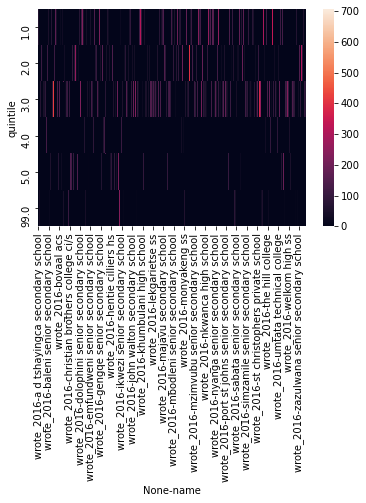

In [52]:
sns.heatmap(pivot_table4)
plt.show()

In [53]:
df_grouped5 = df[['quintile', 'name', 'passed_2016']]
grouped_avg5 = df_grouped5.groupby(['quintile','name'], as_index=False).mean()
grouped_avg5

,quintile,name,passed_2016
0,1.0,a.m.zantsi senior secondary school,49.0
1,1.0,amabele senior secondary school,36.0
2,1.0,baleni senior secondary school,51.0
3,1.0,bambilanga senior secondary school,25.0
4,1.0,barnard molokoane ss,128.0
...,...,...,...
981,99.0,vaal christian ci/s,46.0
982,99.0,vukuzenzele special school,4.0
983,99.0,zamokuhle special school,3.0
984,99.0,zanokhanyo baptist comprehensive sch,8.0


In [54]:
pivot_table5 = grouped_avg5.pivot(index='quintile', columns='name')
pivot_table5 = pivot_table5.fillna(0)
pivot_table5

passed_2016                          \
name     a d tshayingca secondary school a m sityana high school   
quintile                                                           
1.0                                  0.0                     0.0   
2.0                                  0.0                    18.0   
3.0                                126.0                     0.0   
4.0                                  0.0                     0.0   
5.0                                  0.0                     0.0   
99.0                                 0.0                     0.0   

                                             \
name     a.m.zantsi senior secondary school   
quintile                                      
1.0                                    49.0   
2.0                                     0.0   
3.0                                     0.0   
4.0                                     0.0   
5.0                                     0.0   
99.0                                    0.0   

                                                                 \
name     a.v platjie senior secondary school abambo high school   
quintile                                                          
1.0                                      0.0                0.0   
2.0                                      0.0               44.0   
3.0                                     14.0                0.0   
4.0                                      0.0                0.0   
5.0                                      0.0                0.0   
99.0                                     0.0                0.0   

                                                                      \
name     aberdeen senior secondary school academy of excellence ci/s   
quintile                                                               
1.0                                   0.0                        0.0   
2.0                                   0.0                        0.0   
3.0                                  29.0                        0.0   
4.0                                   0.0                        0.0   
5.0                                   0.0                        0.0   
99.0                                  0.0                       35.0   

                                                                     \
name     accelerated christian college si/s accord business academy   
quintile                                                              
1.0                                     0.0                     0.0   
2.0                                     0.0                     0.0   
3.0                                     0.0                     0.0   
4.0                                     0.0                     0.0   
5.0                                     0.0                     0.0   
99.0                                   36.0                     5.0   

                             ...                                       \
name     adelaide gymnasium  ... zwelibangile senior secondary school   
quintile                     ...                                        
1.0                     0.0  ...                                  0.0   
2.0                     0.0  ...                                  0.0   
3.0                     0.0  ...                                 31.0   
4.0                    54.0  ...                                  0.0   
5.0                     0.0  ...                                  0.0   
99.0                    0.0  ...                                  0.0   

                                                                               \
name     zwelidumile senior secondary school zwelihle senior secondary school   
quintile                                                                        
1.0                                     50.0                             17.0   
2.0                                      0.0                              0.0   
3.0                                 

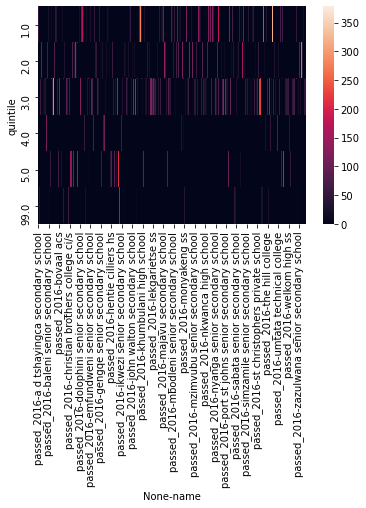

In [55]:
sns.heatmap(pivot_table5)
plt.show()

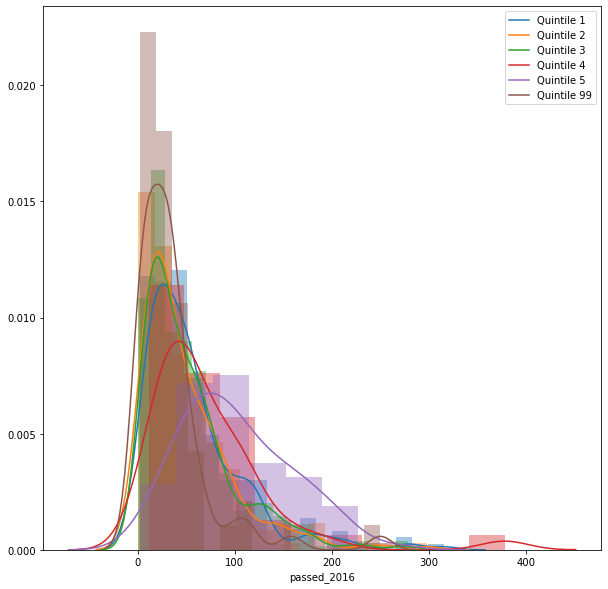

In [56]:
fig = plt.figure(figsize = (10, 10))
sns.distplot(df_bin.loc[df_bin['quintile']==1]['passed_2016'], kde_kws={'label' :'Quintile 1'})
sns.distplot(df_bin.loc[df_bin['quintile']==2]['passed_2016'], kde_kws={'label' :'Quintile 2'})
sns.distplot(df_bin.loc[df_bin['quintile']==3]['passed_2016'], kde_kws={'label' :'Quintile 3'})
sns.distplot(df_bin.loc[df_bin['quintile']==4]['passed_2016'], kde_kws={'label' :'Quintile 4'})
sns.distplot(df_bin.loc[df_bin['quintile']==5]['passed_2016'], kde_kws={'label' :'Quintile 5'})
sns.distplot(df_bin.loc[df_bin['quintile']==99]['passed_2016'], kde_kws={'label' :'Quintile 99'})